## KNN -  K Nearest Neighbour
- Simple Machine Learning Algorithm
- Used for both Classification and Regression
- Supervised Learning Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv('./xdata.csv')
dfy = pd.read_csv('./ydata.csv')

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
X.shape, Y.shape

((399, 3), (399, 2))

In [5]:
X

array([[ 1.00000000e+00,  3.51627900e+00,  3.71975047e+00],
       [ 2.00000000e+00,  4.60649561e+00,  3.41437943e+00],
       [ 3.00000000e+00,  4.67701056e+00,  3.04724443e+00],
       ...,
       [ 3.97000000e+02,  7.89625683e-01,  9.31669806e-01],
       [ 3.98000000e+02, -1.00253042e+00, -6.76162472e-01],
       [ 3.99000000e+02,  2.92386778e-01,  5.61177823e-01]])

In [6]:
X = X[:, 1:]
Y = Y[:, 1:].reshape(-1,)

In [7]:
X.shape,Y.shape

((399, 2), (399,))

In [8]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

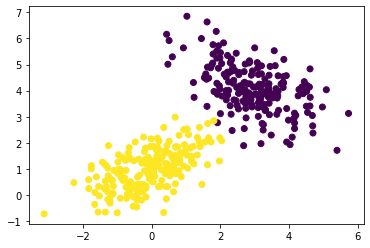

In [9]:
plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

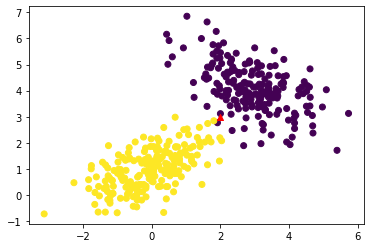

In [10]:
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1], c=Y)
plt.scatter(query_x[0],query_x[1],color = 'r',marker = '^')
plt.show()

In [11]:
# we will euclidean distance

In [52]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,queryPoint,k=5):
    vals = list()
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d,Y[i])) # (distane, class name or label name)
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    vals = np.array(vals)
    #print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True) # return count is counting of value like we do in map
#     print(new_vals)
    max_freq_idx = new_vals[1].argmax()
    pred = new_vals[0][max_freq_idx]
    #return vals
    return pred

In [53]:
# O------------------o
# (1,2,3)            (5,6,7)
# dist = sqrt((1-5)**2 +... )

In [54]:
knn(X,Y,query_x)

(array([0., 1.]), array([3, 2], dtype=int64))


0.0

In [55]:
#(array([0., 1.]), array([3, 2], dtype=int64)) 0.,1. are labels or classes
# and 3,2 are the frequency

# Recogonising Handwritten Digits on MNIST Dataset Using KNN

### Step 1. Data Preperation

In [57]:
df = pd.read_csv('mnist_train.csv')
df.shape

(42000, 785)

In [58]:
df.columns # remove

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [59]:
data = df.values


In [60]:
X = data[:, 1:]
Y = data[:, 0]

In [61]:
X.shape, Y.shape

((42000, 784), (42000,))

In [69]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape),

print(Y_train.shape),

print(X_test.shape),

print(Y_test.shape)

33600
(33600, 784)
(33600,)
(8400, 784)
(8400,)


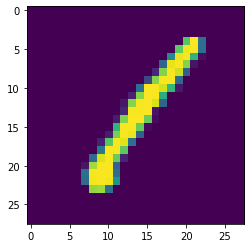

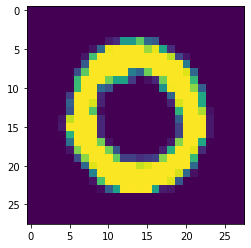

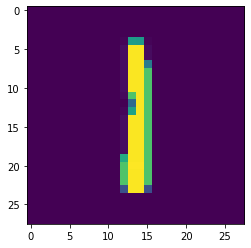

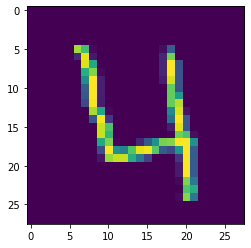

In [74]:
# Visualize Some Sample

def drawImg(sample):
    img = sample.reshape((28,28)) # 784(1d) = 28*28(2d)
    plt.imshow(img)
    plt.show()
    
drawImg(X_train[0])
drawImg(X_train[1])
drawImg(X_train[2])
drawImg(X_train[3])

### Step 2. K-NN

In [ ]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))  

def knn(X,Y,queryPoint,k=5):
    vals = list()
    m = X.shape[0]
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d,Y[i])) # (distane, class name or label name)
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    vals = np.array(vals)
    #print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True) # return count is counting of value like we do in map
#     print(new_vals)
    max_freq_idx = new_vals[1].argmax()
    pred = new_vals[0][max_freq_idx]
    #return vals
    return pred

In [78]:
pred = knn(X_train, Y_train,X_test[0])
print(int(pred))

(array([0.]), array([5], dtype=int64))
0


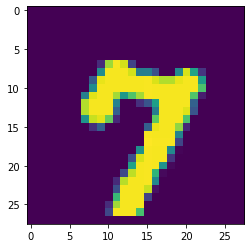

In [82]:
drawImg(X_test[1])

In [83]:
print(Y_test[1])

7
